# 1. Import library

In [675]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass

warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="ticks", color_codes=True, font_scale=1.5)
color = sns.color_palette()
sns.set_style('darkgrid')
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D
import pylab 

from scipy import stats
from scipy.stats import skew, norm, probplot, boxcox
from scipy.special import boxcox1p
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.feature_selection import f_regression, mutual_info_regression, SelectKBest, RFECV, SelectFromModel
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.feature_extraction import FeatureHasher
from sklearn.decomposition import PCA, KernelPCA
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import LinearRegression, OrthogonalMatchingPursuit, Lasso, LassoLarsIC, ElasticNet, RidgeCV,ElasticNetCV
from sklearn.linear_model import SGDRegressor, PassiveAggressiveRegressor, HuberRegressor, BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor
import xgboost as xgb
from xgboost import XGBRegressor, plot_importance
import lightgbm as lgb
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, cross_val_predict, train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 2. Load the data 

In [680]:
## load data
train = pd.read_csv('./train.csv', index_col='Id')
test = pd.read_csv('./test.csv', index_col='Id')
#print(house.columns)
SalePrice_raw = train.SalePrice
SalePrice_log = train.SalePrice.apply(np.log) # the logarithm with base e
print(f"Train data shape : {train.shape}")
print(f"Test data shape : {test.shape}")

Train data shape : (1460, 80)
Test data shape : (1459, 79)


***2.1 - Numerical Data***

In [561]:
numeric=train.describe(include=[np.number])
print(numeric.shape)
numeric.transpose()

(8, 37)


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.000,56.897,42.301,20.000,20.000,50.000,70.000,190.000
LotFrontage,1201.000,70.050,24.285,21.000,59.000,69.000,80.000,313.000
LotArea,1460.000,10516.828,9981.265,1300.000,7553.500,9478.500,11601.500,215245.000
OverallQual,1460.000,6.099,1.383,1.000,5.000,6.000,7.000,10.000
OverallCond,1460.000,5.575,1.113,1.000,5.000,5.000,6.000,9.000
YearBuilt,1460.000,1971.268,30.203,1872.000,1954.000,1973.000,2000.000,2010.000
YearRemodAdd,1460.000,1984.866,20.645,1950.000,1967.000,1994.000,2004.000,2010.000
MasVnrArea,1452.000,103.685,181.066,0.000,0.000,0.000,166.000,1600.000
BsmtFinSF1,1460.000,443.640,456.098,0.000,0.000,383.500,712.250,5644.000
BsmtFinSF2,1460.000,46.549,161.319,0.000,0.000,0.000,0.000,1474.000


***2.2 - Categorical Data***

In [562]:
categorical = train.describe(include=[np.object]).transpose()
categorical['freq%']=categorical['freq']*100/len(train)
categorical=categorical.sort_values(by='freq%',ascending=False)
print(categorical.shape)
categorical

(43, 5)


,count,unique,top,freq,freq%
Utilities,1460,2,AllPub,1459,99.932
Street,1460,2,Pave,1454,99.589
Condition2,1460,8,Norm,1445,98.973
RoofMatl,1460,8,CompShg,1434,98.219
Heating,1460,6,GasA,1428,97.808
LandSlope,1460,3,Gtl,1382,94.658
CentralAir,1460,2,Y,1365,93.493
Functional,1460,7,Typ,1360,93.151
PavedDrive,1460,3,Y,1340,91.781
Electrical,1459,5,SBrkr,1334,91.370


We see that the Utilities category is always equal to Allpub apart from an exemple. We can safely delete this column.
Almost all Street values are equal to 'Pave' so we can delete it as well

In [563]:
train.drop(columns=['Utilities'],inplace=True)

# 3. SalePrice Analysis

In [564]:
SP = pd.concat([SalePrice_raw, SalePrice_log], axis=1, keys=['SalePrice', 'SalePrice(log)'])
SP.describe()

,SalePrice,SalePrice(log)
count,1460.000,1460.000
mean,180921.196,12.024
std,79442.503,0.399
min,34900.000,10.460
25%,129975.000,11.775
50%,163000.000,12.002
75%,214000.000,12.274
max,755000.000,13.534


In [565]:
#Histogram and Distribution
mu, sigma = norm.fit(SP['SalePrice'])
print( f"SalePrice(raw) : mu = {mu} and sigma = {sigma}")
mu2, sigma2 = norm.fit(SP['SalePrice(log)'])
print( f"SalePrice(log-normal) : mu = {mu2} and sigma = {sigma2}")

SalePrice(raw) : mu = 180921.19589041095 and sigma = 79415.29188606751
SalePrice(log-normal) : mu = 12.024050901109383 and sigma = 0.39931504624370256


****SalePrice Raw Distribution****

In [566]:
SP['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

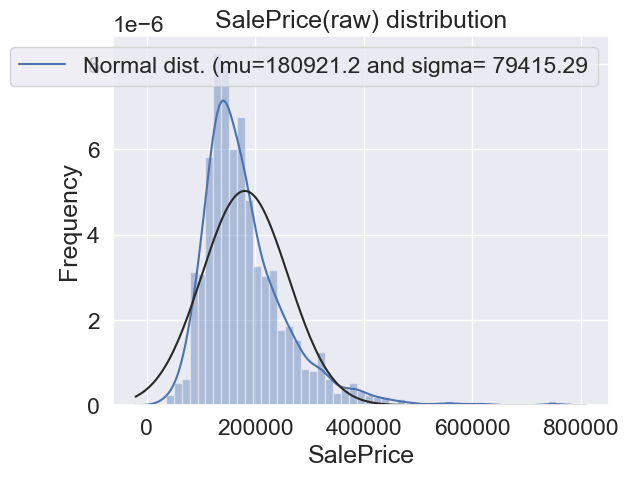

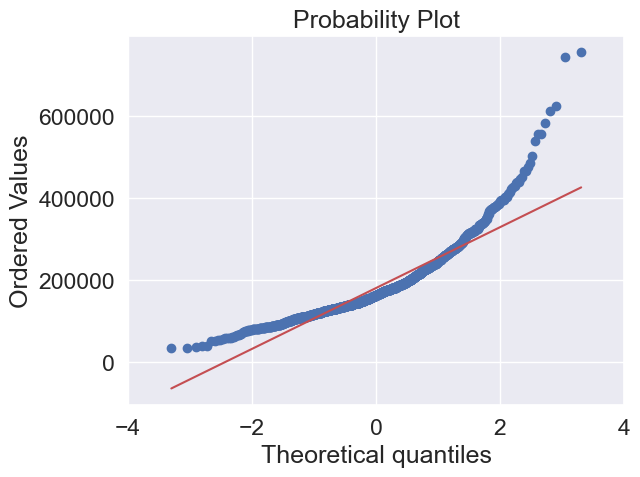

In [567]:
sns.distplot(SP['SalePrice'], fit=norm);
plt.legend([f"Normal dist. (mu={round(mu,2)} and sigma= {round(sigma,2)}"], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice(raw) distribution')

fig = plt.figure()
res = stats.probplot(SP['SalePrice'], plot=plt)
plt.xlim([-4, 4])
plt.show()

We can see that the prices are skewed right and there are some outliers whose value lies above 500000. We will eventually get rid of them to have a normal distribution of the target variable

****SalePrice Log Distribution****

In [568]:
SP['SalePrice(log)'].describe()

count   1460.000
mean      12.024
std        0.399
min       10.460
25%       11.775
50%       12.002
75%       12.274
max       13.534
Name: SalePrice(log), dtype: float64

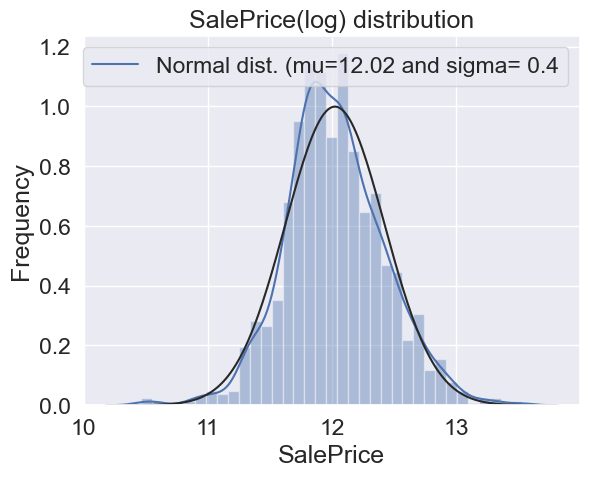

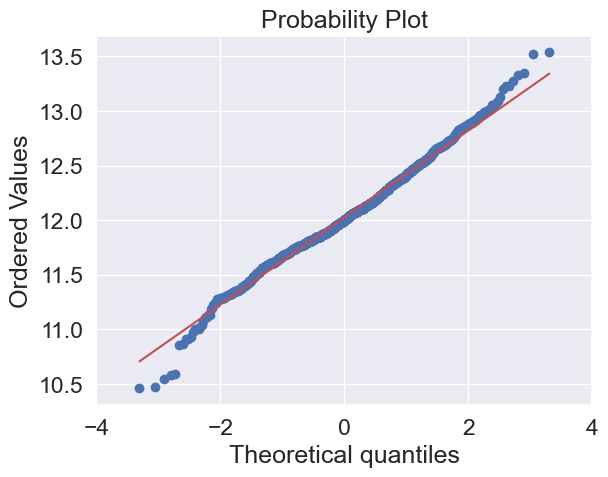

In [569]:
sns.distplot(SalePrice_log , fit=norm);
plt.legend([f"Normal dist. (mu={round(mu2,2)} and sigma= {round(sigma2,2)}"], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice(log) distribution')

fig = plt.figure()
res = stats.probplot(SP['SalePrice(log)'], plot=plt)
plt.xlim([-4, 4])
plt.show()

# 4 Missing Values

In [570]:
missing=train.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)
print(f"There are {len(missing)} features with missing values")
missing

There are 19 features with missing values


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [ ]:
a='Hello Kevin Benassuly'

def is_title(a):
    

We see that some features have more missing values than existing which makes them good candidates to delete. Attention with that case - by reading the text description file, some missing values just mean the feature is absent

In [571]:
perc_missing=missing*100/len(train)
print(f"There are {len(missing)} features with missing values")
perc_missing

There are 19 features with missing values


PoolQC         99.521
MiscFeature    96.301
Alley          93.767
Fence          80.753
FireplaceQu    47.260
LotFrontage    17.740
GarageType      5.548
GarageYrBlt     5.548
GarageFinish    5.548
GarageQual      5.548
GarageCond      5.548
BsmtExposure    2.603
BsmtFinType2    2.603
BsmtFinType1    2.534
BsmtCond        2.534
BsmtQual        2.534
MasVnrArea      0.548
MasVnrType      0.548
Electrical      0.068
dtype: float64

In [572]:
#We replace the missing values by the most frequent value of the Electrical category
train.Electrical.fillna(train.Electrical.mode(),inplace=True)

In [573]:
#For the Basement feature, we see that NA means there is no basement
for col in ['BsmtFinType1','BsmtCond','BsmtQual','BsmtFinType2','BsmtExposure']:
    train[col].fillna('NA',inplace=True)
    
#Same goes for the Garage Features - NA means no Garage
for col in ['GarageFinish','GarageQual','GarageCond','GarageType','GarageYrBlt']:
    train[col].fillna('NA',inplace=True)

****MasVnrType and MasVnrArea****

In [574]:
train['MasVnrArea'].fillna(0,inplace=True)
train['MasVnrType'].fillna('None',inplace=True)
train['FireplaceQu'].fillna('NA',inplace=True)
train['PoolQC']=train['PoolQC'].fillna('NA')
train['Fence']=train['Fence'].fillna('NA')
train['Alley']=train['Alley'].fillna('NA')
train['MiscFeature']=train['MiscFeature'].fillna('None')
train['Electrical']=train['Electrical'].fillna('SBrkr')

In [575]:
#For LotFrontage we will take the median value depending on neighborhood
train['LotFrontage']=train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [576]:
missing=train.isnull().sum()
missing=missing[missing>0].sort_values(ascending=False)
missing

Series([], dtype: int64)

# Transforming "numerical" columns which are actually categorical

In [577]:
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

# 5 Mapping Ordinal Data

In [578]:
#Converting ordinal data to their corresponding values
def map_ordinals(train):
    train['ExterQual'] = train['ExterQual'].map(lambda x: {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
    train['BsmtQual'] = train['BsmtQual'].map(lambda x: {'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
    train['KitchenQual'] = train['KitchenQual'].map(lambda x: {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
    train['GarageFinish'] = train['GarageFinish'].map(lambda x: {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}.get(x, 0))
    train['FireplaceQu'] = train['FireplaceQu'].map(lambda x: {'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
    train['HeatingQC'] = train['HeatingQC'].map(lambda x: {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
    train['LandSlope']= train['LandSlope'].map({'Gtl':3,'Mod':2,'Sev':1})
    train['ExterCond'] = train['ExterCond'].map(lambda x: {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
    train['GarageCond'] = train['GarageCond'].map(lambda x: {'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
    train['PavedDrive']=train['PavedDrive'].map({'Y':3,'P':2,'N':1})
    train['LotShape']=train['LotShape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})
    train['BsmtCond'] = train['BsmtCond'].map(lambda x: {'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
    train['GarageQual'] = train['GarageQual'].map(lambda x: {'NA':0,'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}.get(x, 0))
    train['BsmtExposure']=train['BsmtExposure'].map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
    train['BsmtFinType1']=train['BsmtFinType1'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
    train['BsmtFinType2']=train['BsmtFinType2'].map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
    train['CentralAir']=train['CentralAir'].map({'Y':1,'N':0})
    train['Functional']=train['Functional'].map({'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0})
    train['Street']=train['Street'].map({'Grvl':0,'Pave':1})
    train['Fence']=train['Fence'].map({'NA':0,'MnWw':1,'GdWo':2,'MnPrv':3,'GdPrv':4})
    return train

In [579]:
train=map_ordinals(train)

# 6. Exploratory Analysis

****Numerical features****

In [580]:
df_numerical = train.select_dtypes(include=['number'])
df_numerical.columns

Index(['LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandSlope',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'Fence', 'MiscVal', 'SalePrice'],
      dtype='object')

In [581]:
print(f"There are {len(df_numerical.columns)} numeric features")

There are 53 numeric features


****Pair plots****

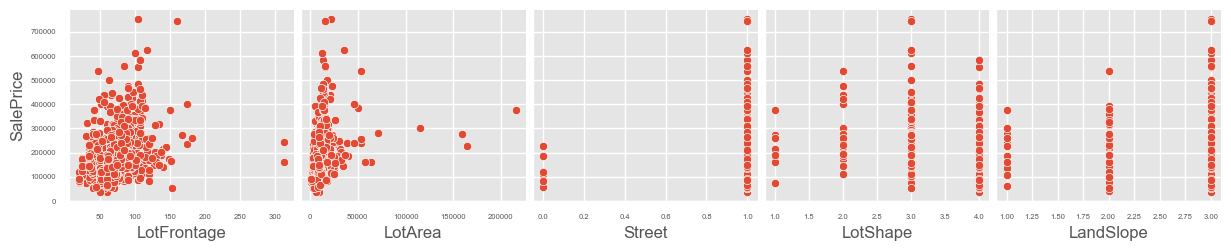

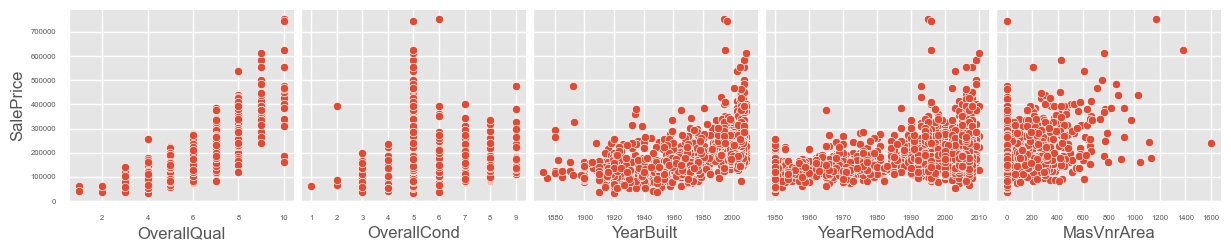

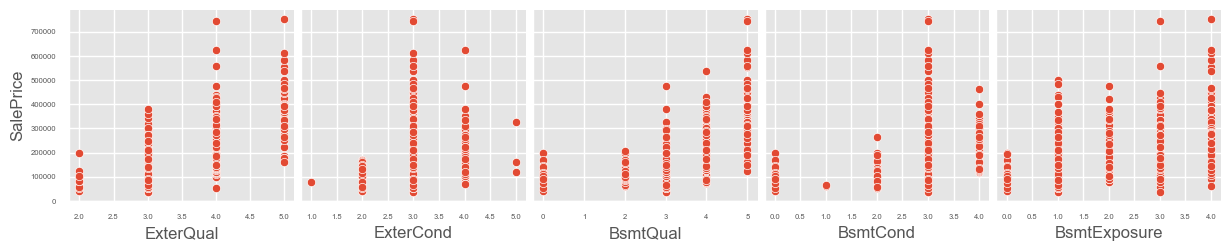

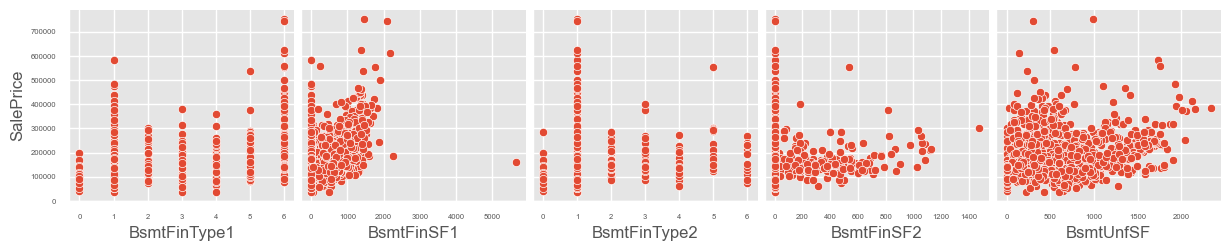

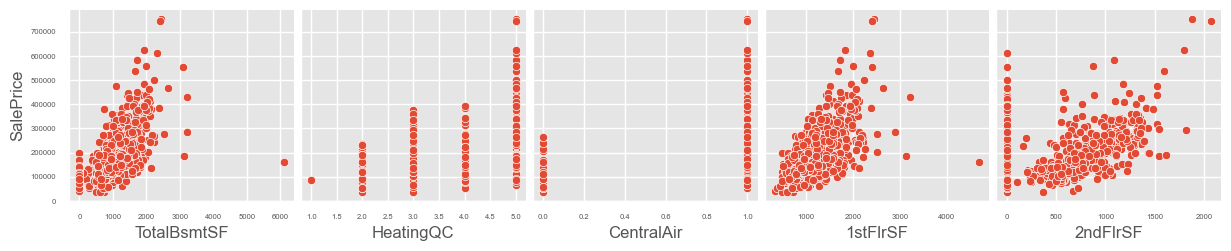

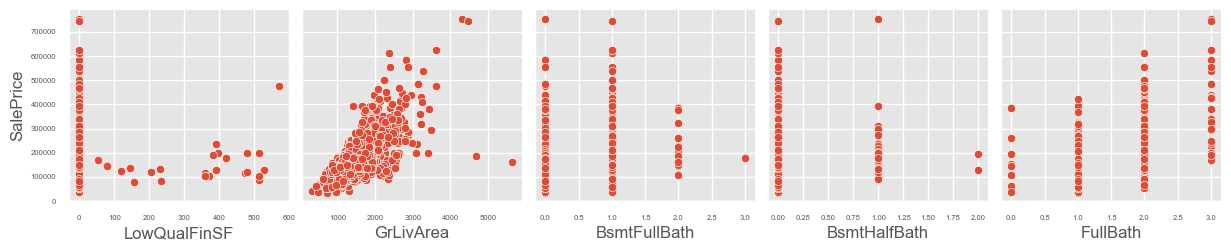

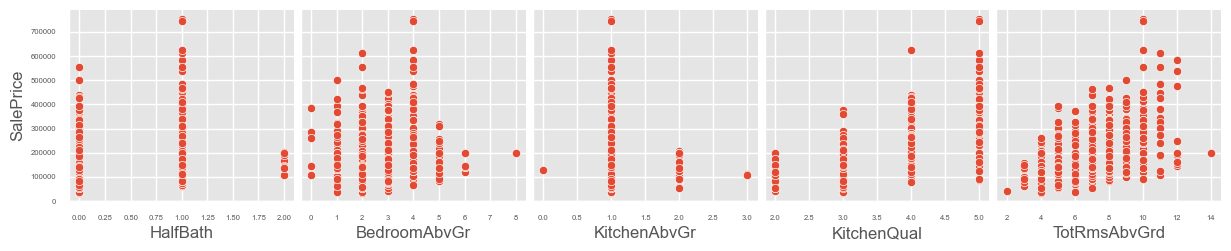

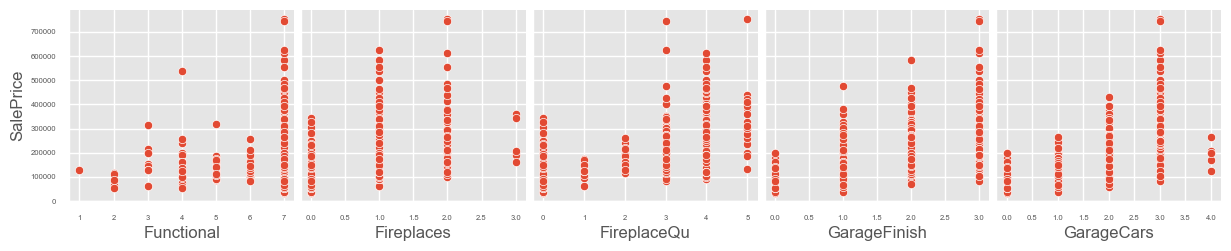

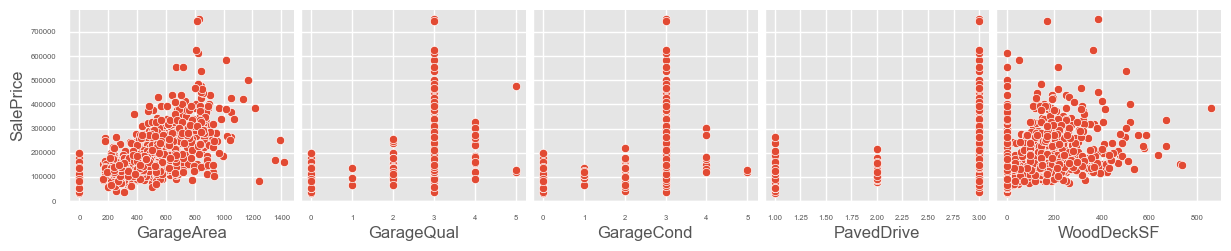

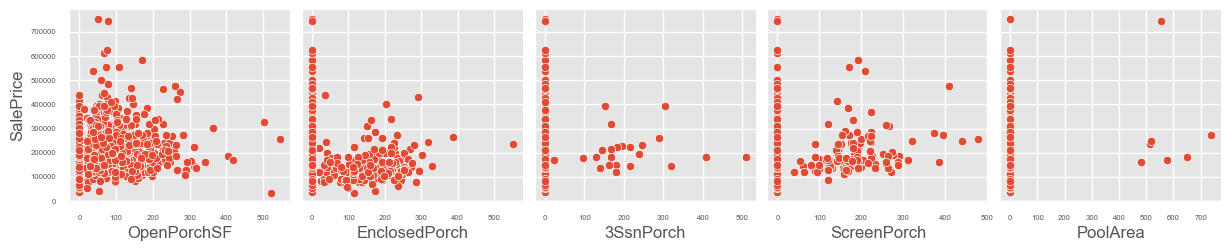

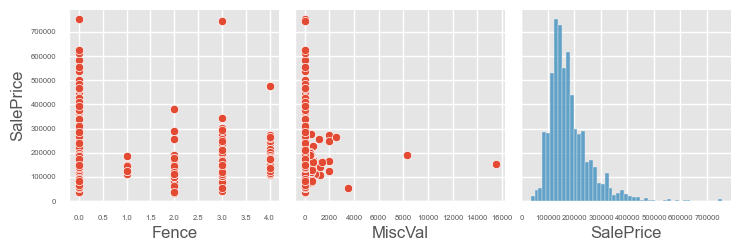

In [530]:
for i in range(0, len(df_numerical.columns), 5):
    sns.pairplot(data=df_numerical,
                x_vars=df_numerical.columns[i:i+5],
                y_vars='SalePrice')

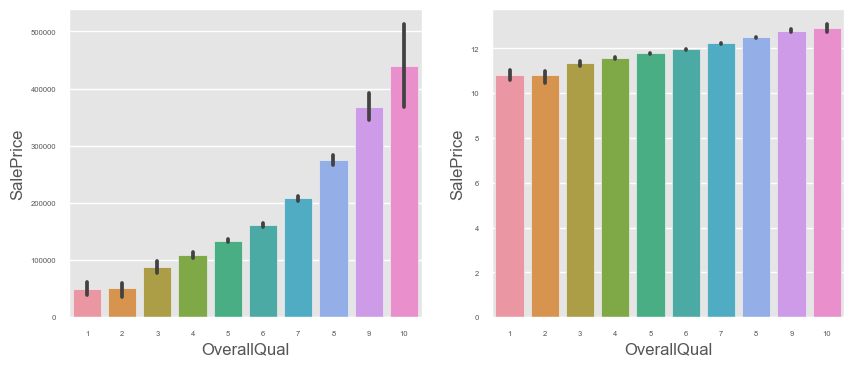

In [531]:
fig, ax = plt.subplots(1, 2, figsize = (10, 4))
sns.barplot(train.OverallQual,SalePrice_raw, ax = ax[0]);
sns.barplot(train.OverallQual,SalePrice_log, ax = ax[1]);

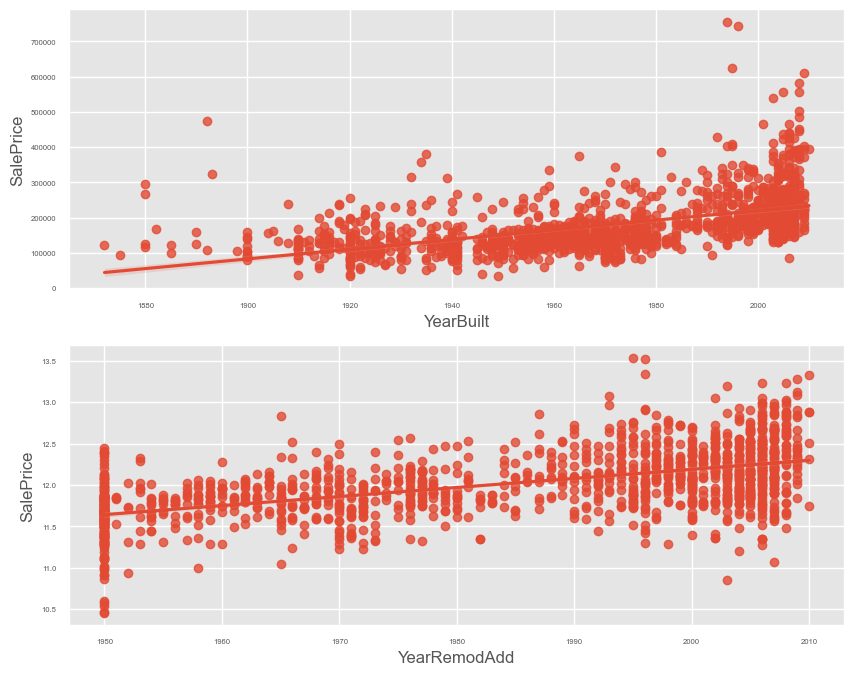

In [532]:
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
sns.regplot(train.YearBuilt,SalePrice_raw, ax = ax[0]);
sns.regplot(train.YearRemodAdd,SalePrice_log, ax = ax[1]);

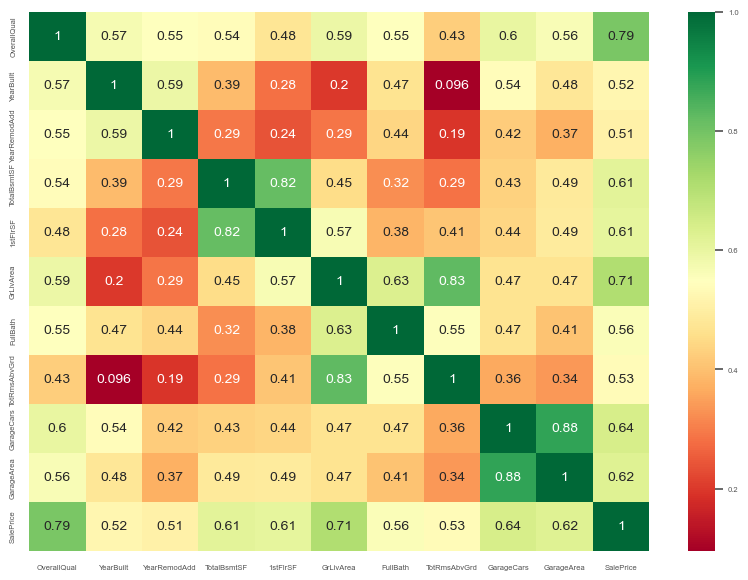

In [533]:
import matplotlib.pyplot as plt
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
fig = plt.figure(figsize=(10,7))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

We notice that
- GarageCars and GarageArea have a high correlation
- TotRmsAbvGrd and GrLivArea also
- TotalBsmtSF and 1stFlrSF

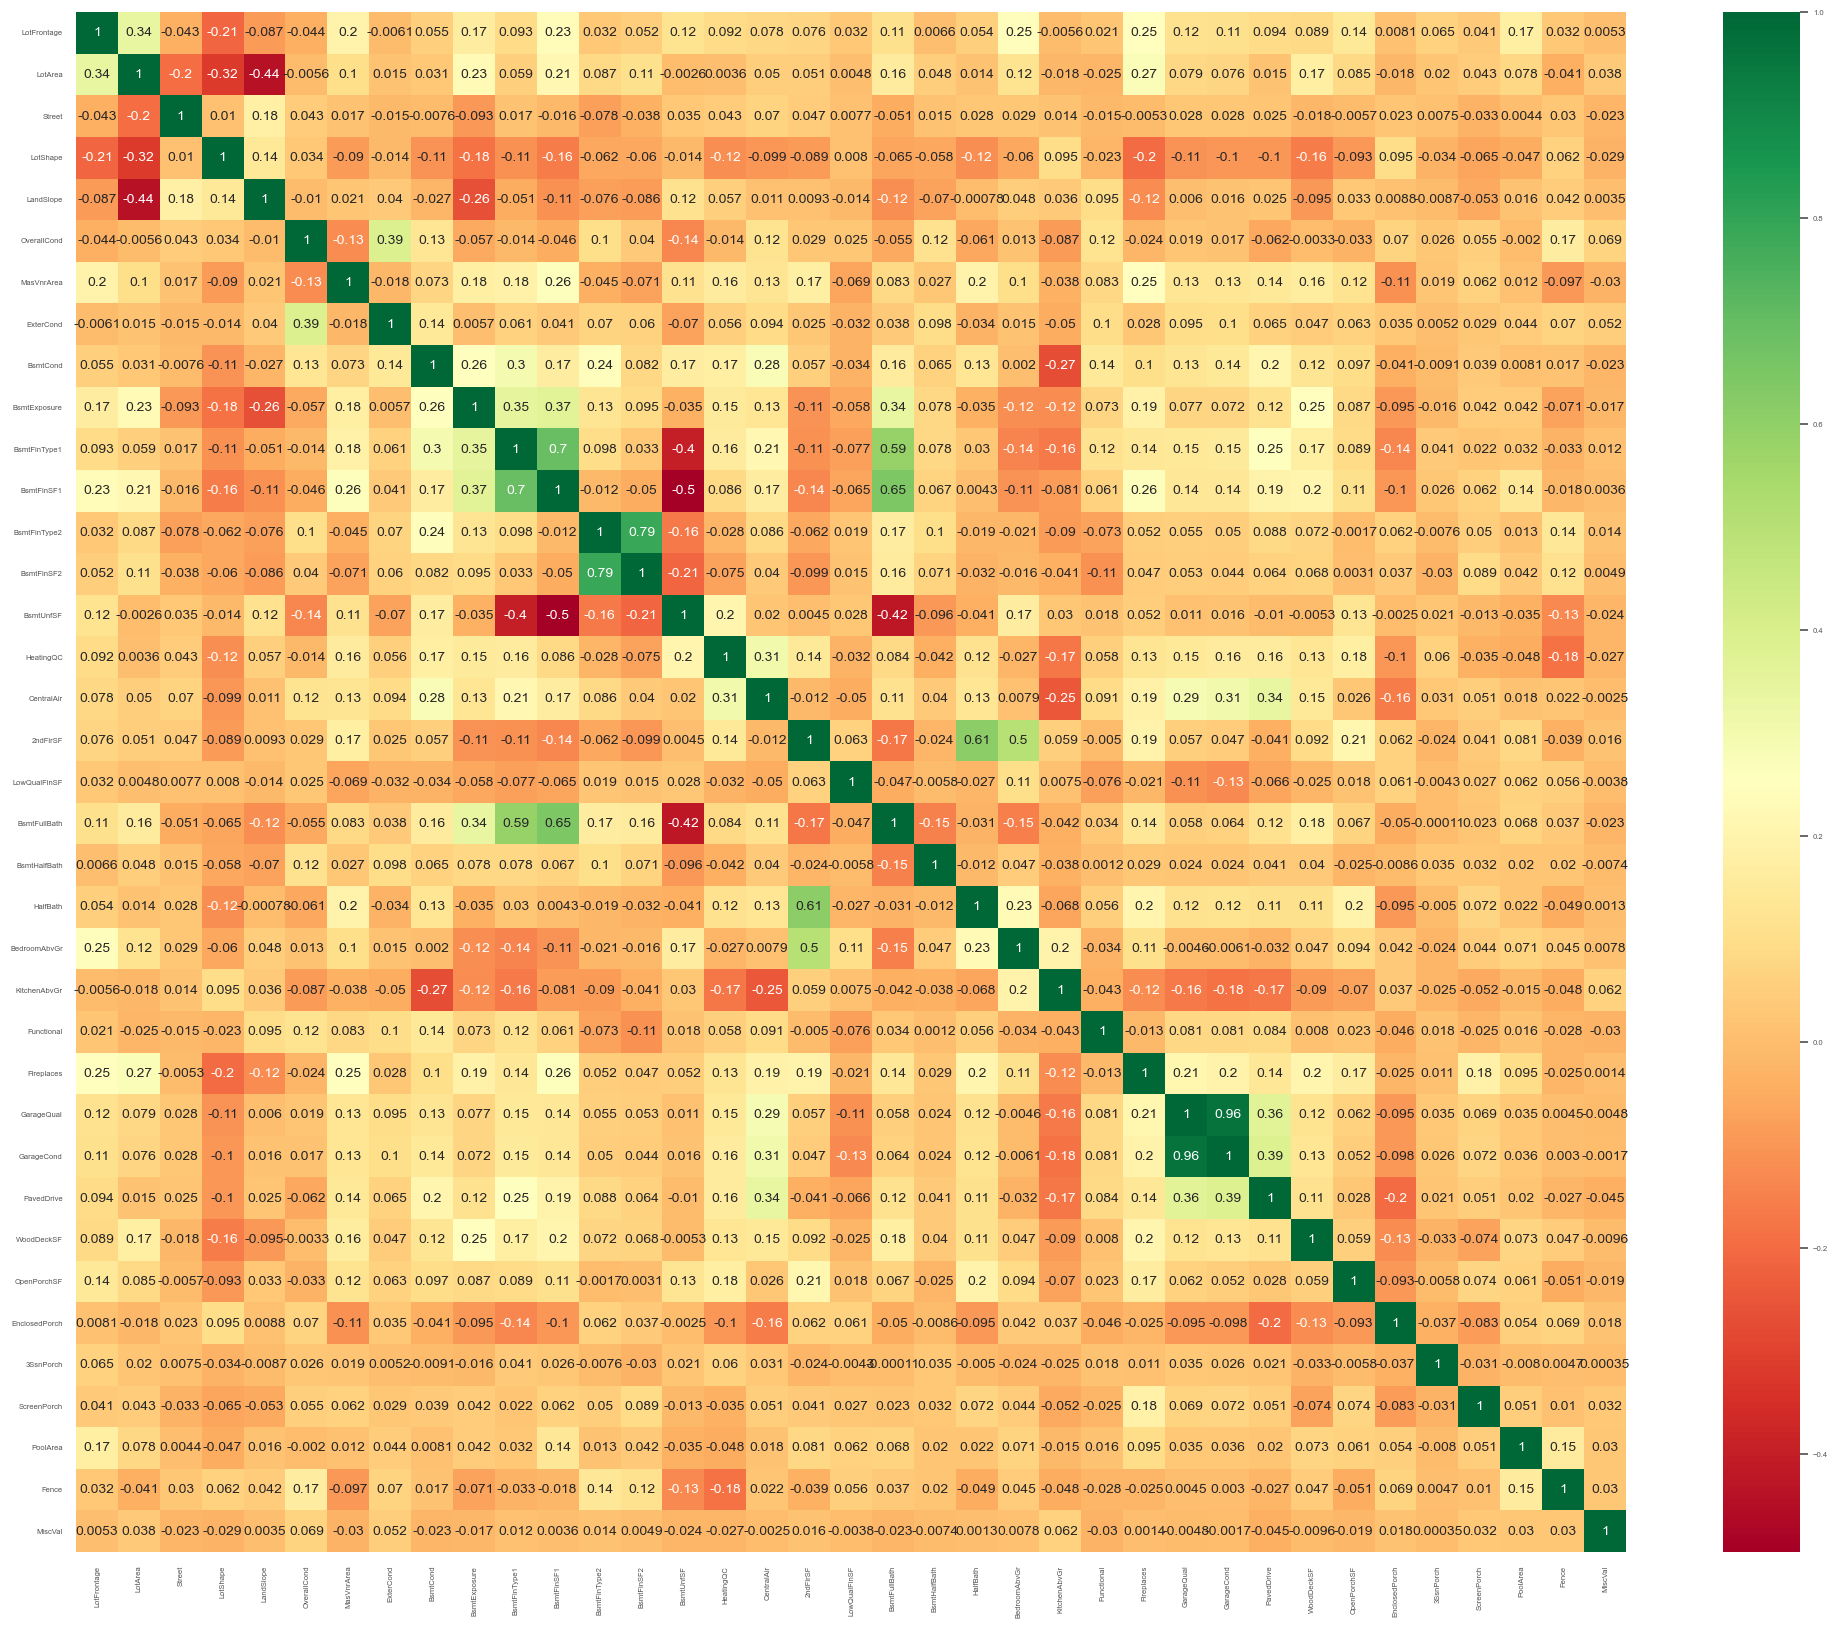

In [534]:
least_corr_features = corrmat.index[abs(corrmat["SalePrice"])<=0.5]
fig = plt.figure(figsize=(25,20))
g = sns.heatmap(train[least_corr_features].corr(),annot=True,cmap="RdYlGn")

***Categorical variables***

In [535]:
cat_columns=[col for col in train.columns if col not in df_numerical.columns]
cat_columns

['MSSubClass',
 'MSZoning',
 'Alley',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'PoolQC',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

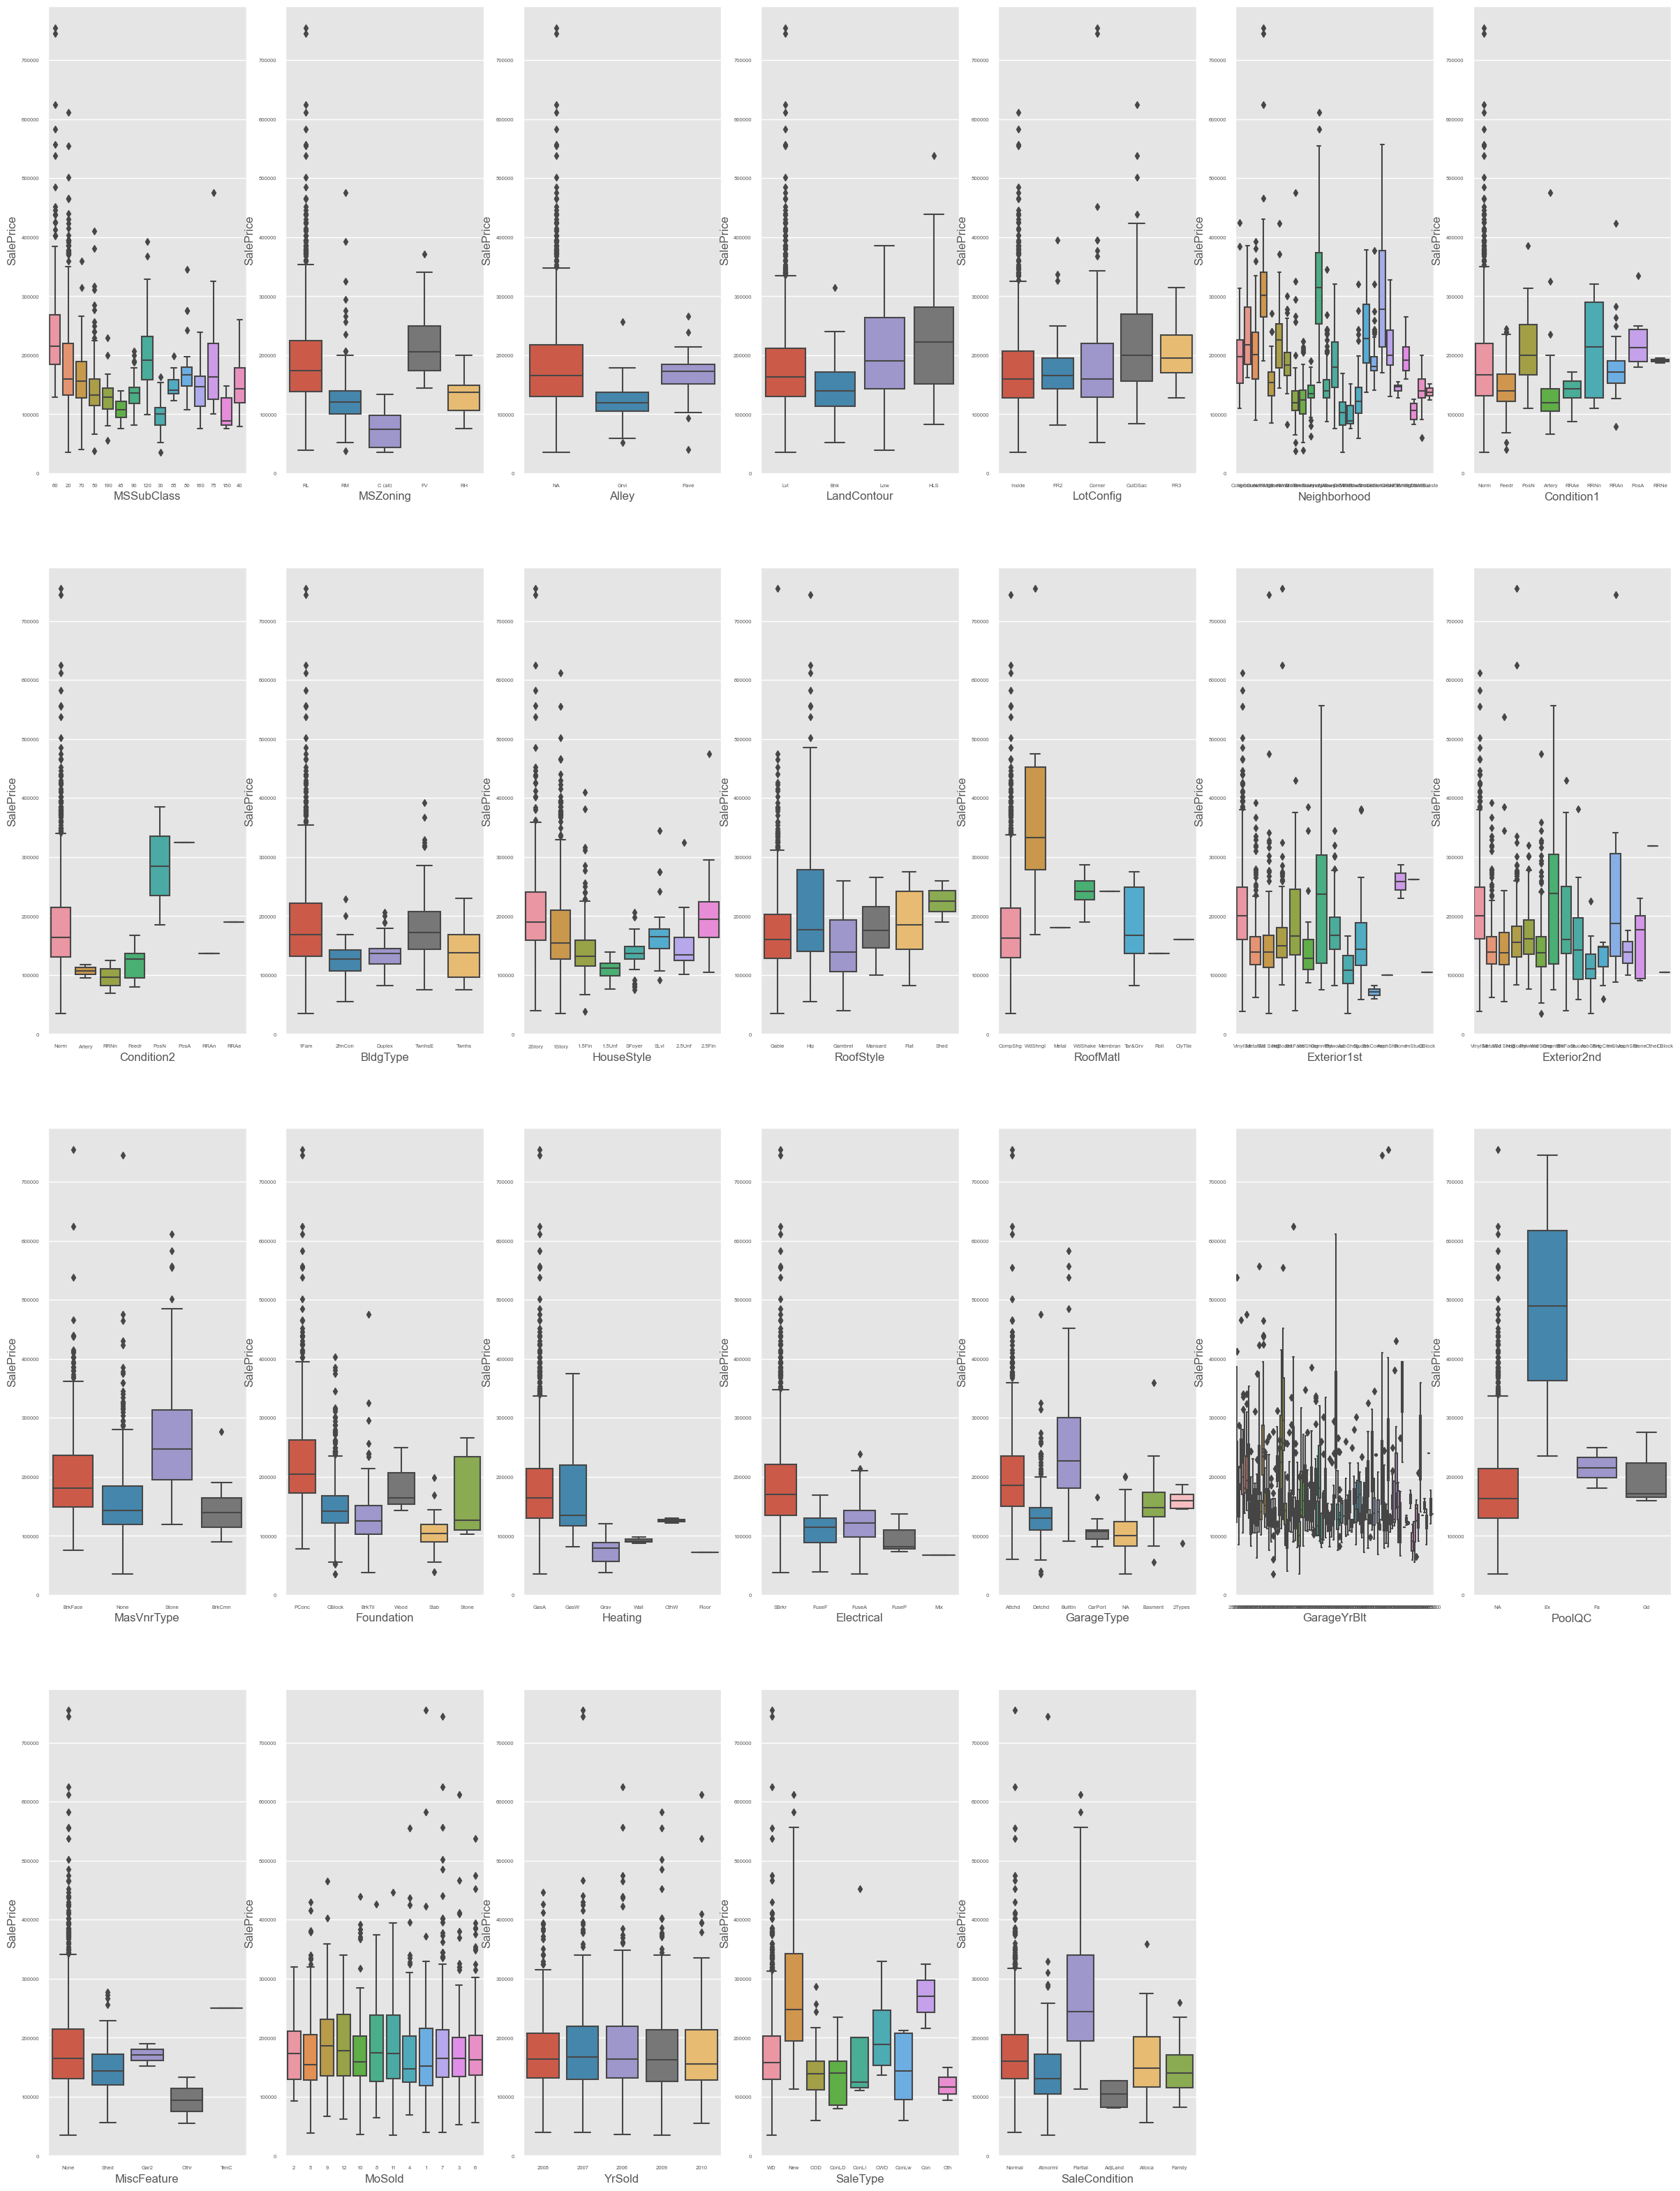

In [536]:
df_categorical=train[cat_columns]
fig = plt.figure(figsize= (30, 40))
for i in range(len(df_categorical.columns)):
    plt.subplot(len(df_categorical.columns)//6, 7, i + 1)
    sns.boxplot(x = df_categorical.columns[i], y = 'SalePrice', data = train)

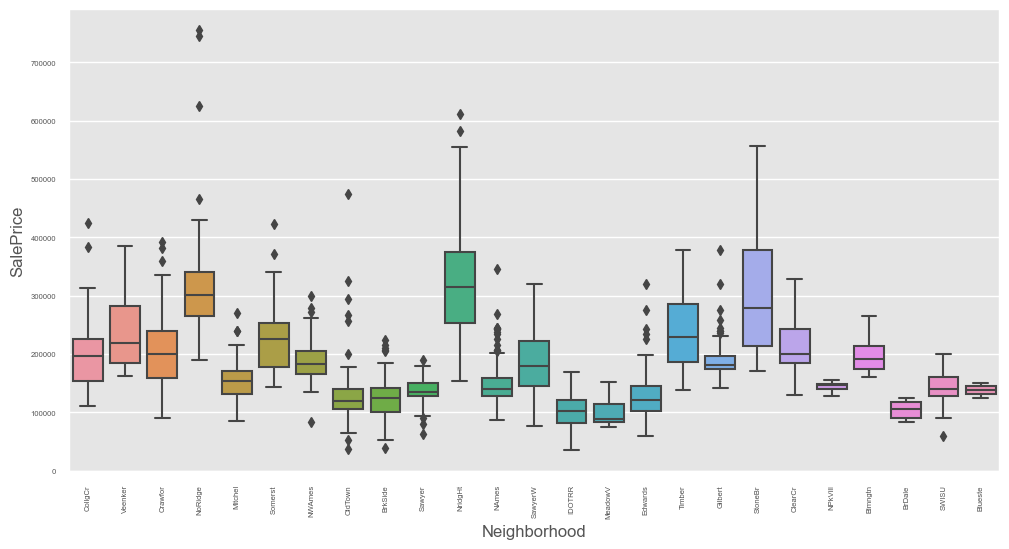

In [537]:
fig = plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = train)
xt = plt.xticks(rotation=90)

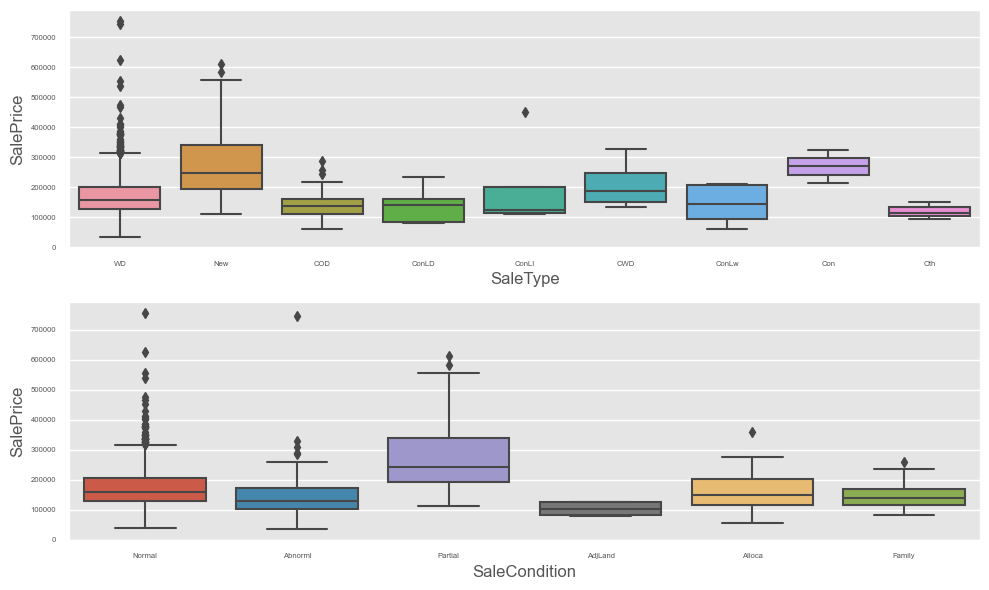

In [538]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train, ax = ax[1])
plt.tight_layout()

# Fix Skewed Features

In [582]:
#train = train[train.GrLivArea < 4500]
#train.reset_index(drop=True, inplace=True)
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train['SalePrice'].reset_index(drop=True)
train = train.drop(['SalePrice'], axis=1)

In [583]:
skew_features = df_numerical.drop(['SalePrice'],axis=1).apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index
skew_index

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'BsmtFinType2', 'EnclosedPorch', 'MasVnrArea', 'OpenPorchSF',
       'LotFrontage', 'Fence', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF',
       'ExterCond', '1stFlrSF', 'GrLivArea', 'BsmtExposure', 'BsmtUnfSF',
       'ExterQual', '2ndFlrSF', 'OverallCond', 'TotRmsAbvGrd', 'HalfBath',
       'Fireplaces', 'BsmtFullBath'],
      dtype='object')

In [584]:
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
for col in skew_index:
    train[col] = boxcox1p(train[col], boxcox_normmax(train[col] + 1))

# 7 - Feature Engineering

In [585]:
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']
train['TotBathrooms'] = train.FullBath + (train.HalfBath*0.5) + train.BsmtFullBath + (train.BsmtHalfBath*0.5)
train['Total_porch_sf'] = train['OpenPorchSF'] + train['3SsnPorch'] +train['EnclosedPorch'] + train['ScreenPorch'] + train['WoodDeckSF']
train['Haspool'] = train['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
train['Has2ndfloor'] = train['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
train['Hasgarage'] = train['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
train['Hasbsmt'] = train['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
train['Hasfireplace'] = train['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

# 8 - Feature Selection

In [601]:
cols=df_numerical.columns.tolist()
cols.remove('SalePrice')

In [605]:
scale = RobustScaler()
# Data without Polynomials
df = pd.DataFrame(scale.fit_transform(train[cols]))
df

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,-0.255,-0.268,0.000,0.000,0.000,0.500,0.000,0.652,0.243,1.086,...,0.000,0.000,0.000,0.363,0.000,0.000,0.000,0.000,0.000,0.000
1,0.478,0.030,0.000,0.000,0.000,0.000,2.822,0.065,-0.486,0.000,...,0.000,0.000,1.469,-0.582,0.000,0.000,0.000,0.000,0.000,0.000
2,-0.101,0.399,0.000,-1.000,0.000,0.500,0.000,0.609,0.216,0.994,...,0.000,0.000,0.000,0.193,0.000,0.000,0.000,0.000,0.000,0.000
3,-0.522,0.018,0.000,-1.000,0.000,0.500,0.000,-1.261,-0.649,0.000,...,0.000,0.000,0.000,0.120,19.032,0.000,0.000,0.000,0.000,0.000
4,0.659,0.950,0.000,-1.000,0.000,1.000,0.000,0.587,0.162,1.419,...,0.000,0.000,1.094,0.534,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.413,-0.420,0.000,0.000,0.000,0.000,0.000,0.565,0.162,0.000,...,0.000,0.000,0.000,0.172,0.000,0.000,0.000,0.000,0.000,0.000
1456,0.704,0.766,0.000,0.000,0.000,0.000,1.000,0.109,-0.162,0.858,...,0.000,0.000,1.633,-0.582,0.000,0.000,0.000,0.000,2.775,0.000
1457,-0.203,-0.110,0.000,0.000,0.000,0.500,3.663,-0.696,0.324,0.000,...,0.000,0.000,0.000,0.355,0.000,0.000,0.000,0.000,3.646,8.658
1458,-0.101,0.058,0.000,0.000,0.000,-0.500,1.000,-0.500,0.054,0.000,...,0.000,0.000,1.685,-0.582,12.947,0.000,0.000,0.000,0.000,0.000


****8.1 - Recursive Feature Elimination****

In [626]:
ls = Lasso(alpha = 0.0005, max_iter = 161, selection = 'cyclic', tol = 0.002, random_state = 101)
rfecv = RFECV(estimator=ls, n_jobs = -1, step=1, scoring = 'neg_mean_squared_error' ,cv=5)
rfecv.fit(df, y)

select_features_rfecv = rfecv.get_support()
RFEcv = np.array(cols)[select_features_rfecv]
print('{:d} Features Select by RFEcv:\n{:}'.format(rfecv.n_features_, RFEcv))

46 Features Select by RFEcv:
['LotFrontage' 'LotArea' 'Street' 'LotShape' 'LandSlope' 'OverallQual'
 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'ExterQual' 'ExterCond'
 'BsmtQual' 'BsmtCond' 'BsmtExposure' 'BsmtFinType1' 'BsmtFinSF1'
 'BsmtFinType2' 'BsmtFinSF2' 'TotalBsmtSF' 'HeatingQC' 'CentralAir'
 '1stFlrSF' '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageFinish' 'GarageCars'
 'GarageQual' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'Fence' 'MiscVal']


In [636]:
deleted_cols=[col for col in cols if col not in RFEcv]
deleted_cols

['MasVnrArea',
 'BsmtUnfSF',
 'BsmtHalfBath',
 'TotRmsAbvGrd',
 'GarageArea',
 'GarageCond']

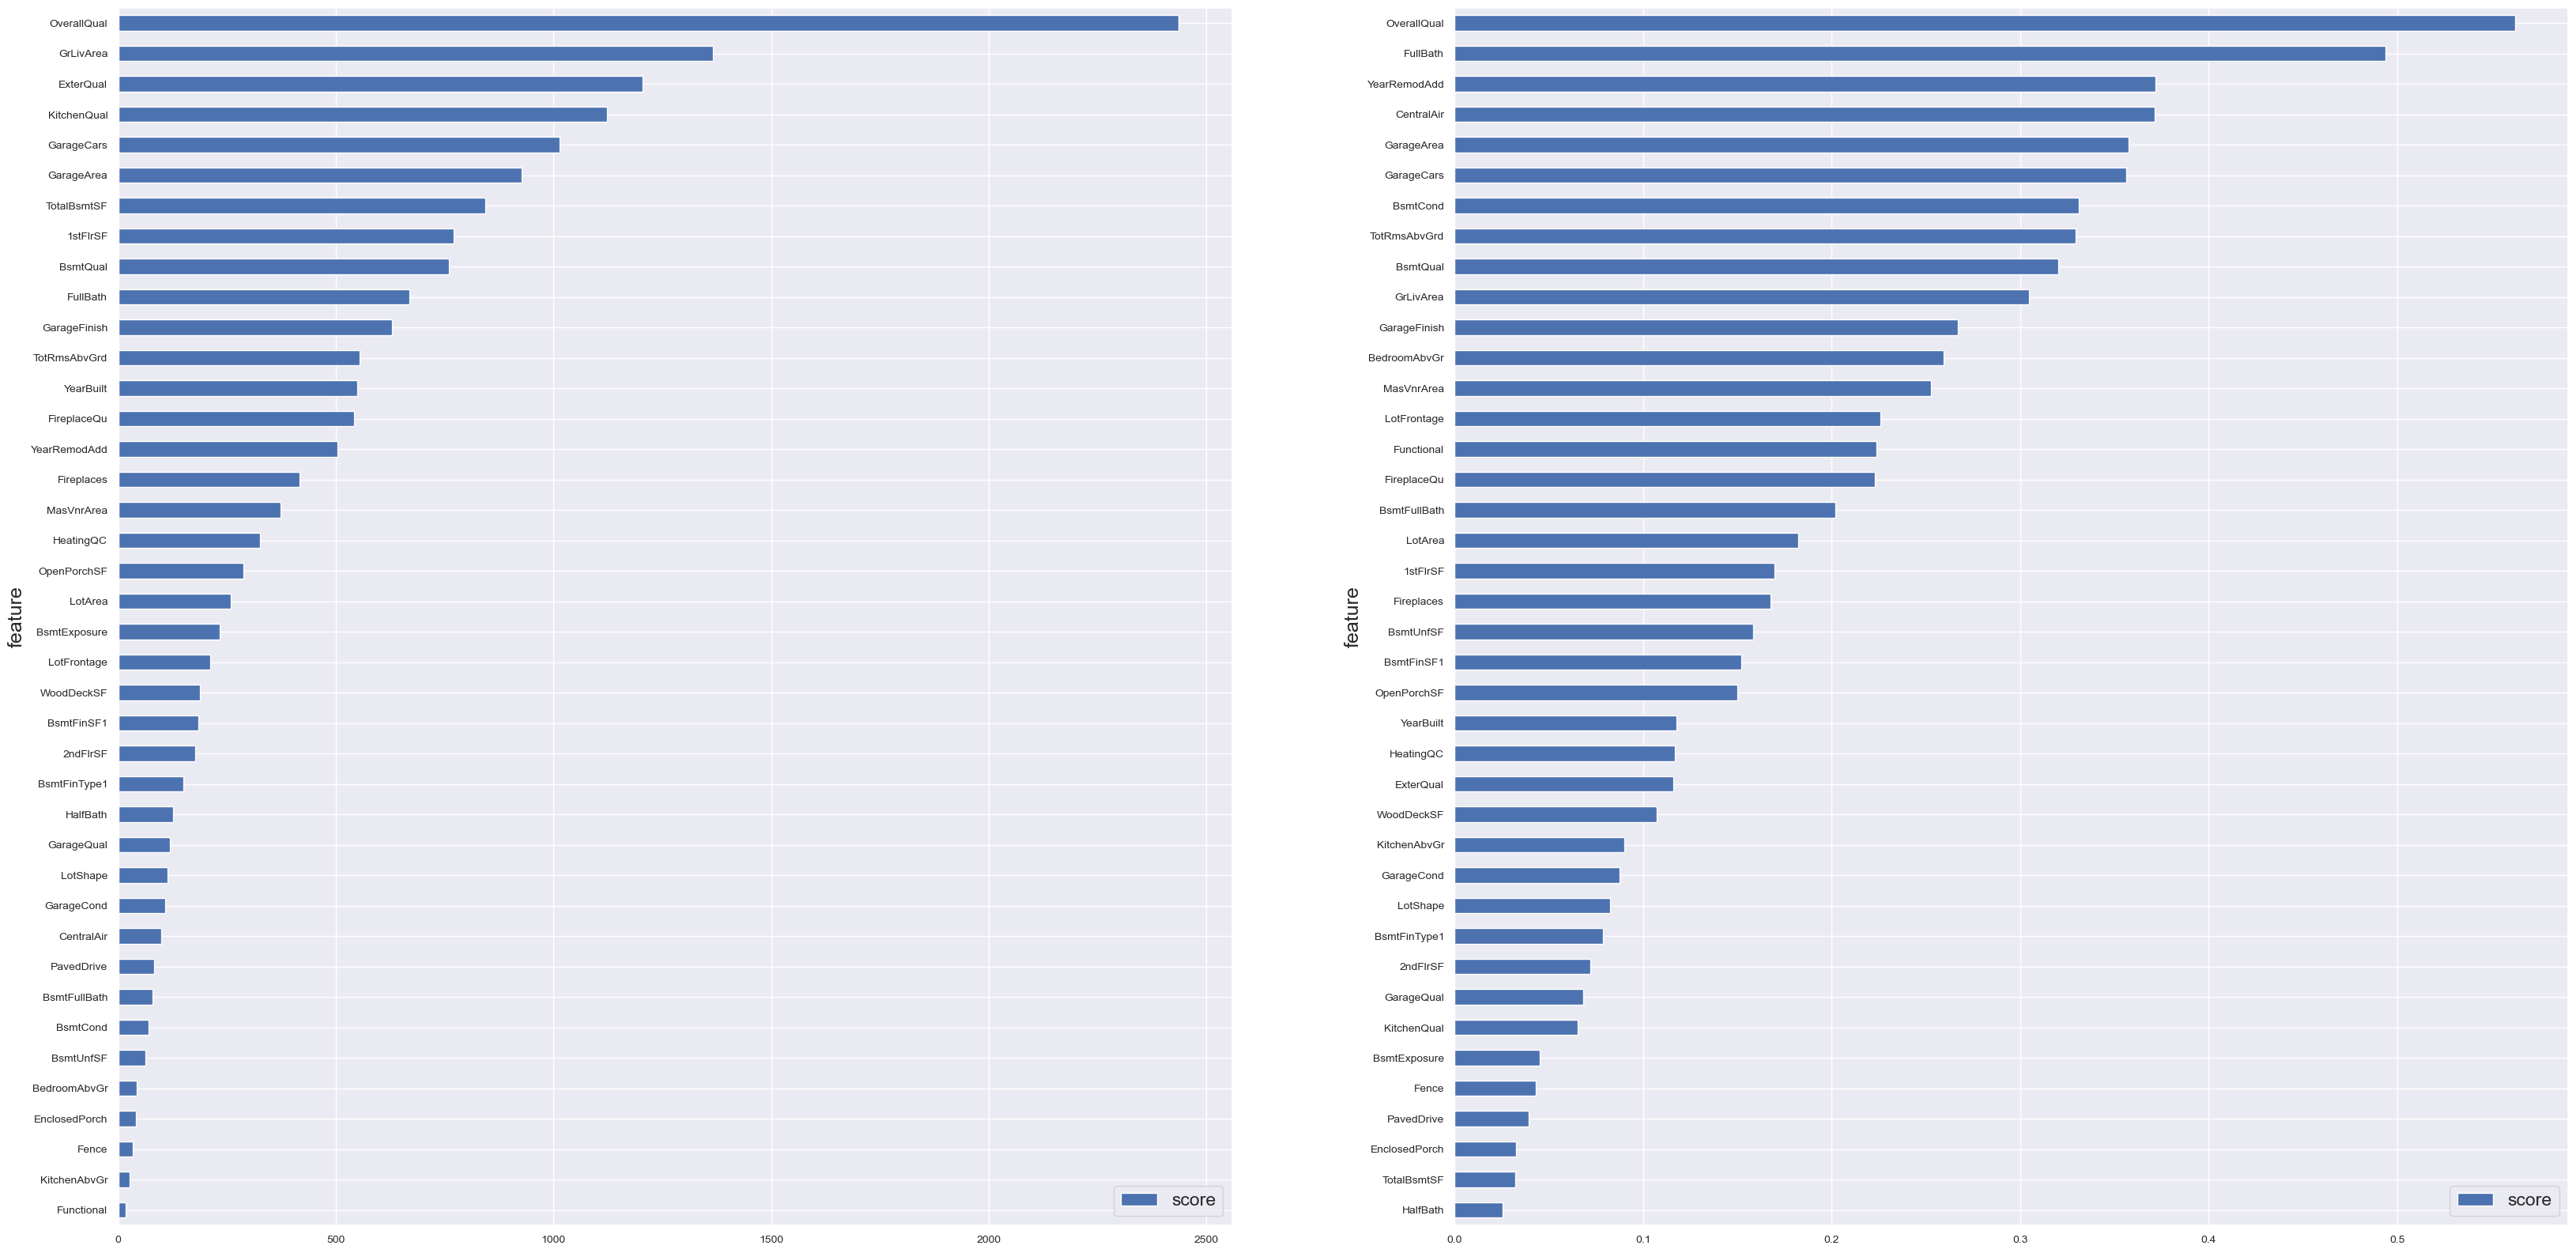

In [643]:
skb = SelectKBest(score_func=f_regression, k=40)
skb.fit(df, SalePrice_raw.values)
select_features_kbest = skb.get_support()
kbest_FR = np.array(cols)[select_features_kbest]
scores = skb.scores_[select_features_kbest]
feature_scores = pd.DataFrame([(item, score) for item, score in zip(kbest_FR, scores)], columns=['feature', 'score'])
fig = plt.figure(figsize=(40,20))
f1 = fig.add_subplot(121)
feature_scores.sort_values(by='score', ascending=True).plot(y = 'score', x = 'feature', kind='barh', 
                                                            ax = f1, fontsize=10, grid=True) 

skb = SelectKBest(score_func=mutual_info_regression, k=40)
skb.fit(df, SalePrice_raw.values)
select_features_kbest = skb.get_support()
kbest_MIR = np.array(cols)[select_features_kbest]
scores = skb.scores_[select_features_kbest]
feature_scores = pd.DataFrame([(item, score) for item, score in zip(kbest_FR, scores)], columns=['feature', 'score'])
f2 = fig.add_subplot(122)
feature_scores.sort_values(by='score', ascending=True).plot(y = 'score', x = 'feature', kind='barh', 
                                                            ax = f2, fontsize=10, grid=True) 
plt.show()

In [ ]:
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

# fit model on all training data
#importance_type='gain'
model =  XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0, max_delta_step=0, 
                      random_state=101, min_child_weight=1, missing=None, n_jobs=4,  
                      scale_pos_weight=1, seed=None, silent=True, subsample=1)


model.fit(train, SalePrice_raw.values)
fig=plt.figure(figsize=(20,20))
ax = fig.add_subplot(121)
g = plot_importance(model, height=0.5, ax=ax)

In [657]:
train = train.drop(['Street', 'PoolQC',], axis=1)

In [658]:
final_train = pd.get_dummies(train).reset_index(drop=True)
final_train.shape

(1460, 354)

In [662]:
X=final_train

In [ ]:
outliers = [30, 88, 462, 631, 1322]
X=final_train
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])